In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

In [3]:
os.chdir("C:\\Users\\rgoulika\\Downloads")
emp=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
emp.shape

(1470, 35)

In [4]:

num_features = ["Age", "DailyRate", "DistanceFromHome", "Education", "MonthlyIncome" ,"NumCompaniesWorked",
"PercentSalaryHike","RelationshipSatisfaction",
"StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany",
"YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager",
"EmployeeNumber","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction"]

In [5]:
char_features=["BusinessTravel","Department", "EducationField","OverTime","Gender","JobRole","MaritalStatus"]

In [7]:
emp_mod=emp.copy()

In [8]:
emp_mod=emp[num_features+char_features]

In [9]:
emp_mod.shape

(1470, 27)

In [10]:
emp_mod["BusinessTravel"] = emp_mod["BusinessTravel"].replace(["Travel_Rarely","Travel_Frequently","Non-Travel"],[0,1,2]);

C:\Users\rgoulika\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
emp_mod['BusinessTravel'].unique()

array([0, 1, 2], dtype=int64)

In [12]:
emp_mod["MaritalStatus"] = emp_mod["MaritalStatus"].replace(["Single","Married","Divorced"],[0,1,2]);
emp_mod["Gender"] = emp_mod["Gender"].replace(["Female","Male"],[0,1]);

C:\Users\rgoulika\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rgoulika\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
emp_mod["Department"] = emp_mod["Department"].replace(["Sales","Research & Development","Human Resources"],[0,1,2]);

emp_mod["EducationField"] = emp_mod["EducationField"].replace(["Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"],[0,1,2,3,4,5]);

emp_mod["OverTime"] = emp_mod["OverTime"].replace(["Yes","No"],[0,1]);

emp_mod["JobRole"] = emp_mod["JobRole"].replace(["Sales Executive","Sales Representative","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Research Director","Human Resources"],[0,1,2,3,4,5,6,7,8]);

C:\Users\rgoulika\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rgoulika\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rgoulika\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [14]:
y=emp['Attrition'].replace(["Yes","No"],[0,1]);

In [15]:
y.shape

(1470,)

In [16]:
emp_mod.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
MonthlyIncome               int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobSatisfaction             int64
BusinessTravel              int64
Department                  int64
EducationField              int64
OverTime                    int64
Gender                      int64
JobRole                     int64
MaritalStatus               int64
dtype: object

In [17]:
y.dtypes

dtype('int64')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(emp_mod, y, test_size=.2,
                                                    random_state=0)

In [15]:
X_train.shape

(1176, 27)

In [16]:
X_test.shape

(294, 27)

In [18]:
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.externals.six import StringIO

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,BaggingRegressor,GradientBoostingClassifier,GradientBoostingRegressor

from sklearn.metrics import confusion_matrix,classification_report, mean_squared_error
import statsmodels.formula.api as sm
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [1]:
type = ['svm']
#sm = [SMOTE(kind=k) for k in kind]
for t in type:
    sampt=SMOTE(kind=t)
X_resampled = []
y_resampled = []
#X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(emp_mod, y)

NameError: name 'SMOTE' is not defined

In [18]:
model=RandomForestRegressor(max_depth=5,n_estimators=500,oob_score=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

Text(0,0.5,'Frequency')

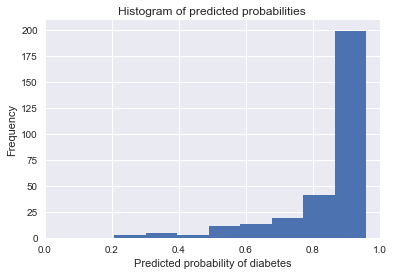

In [24]:
plt.hist(pred, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [25]:
pred

array([0.94075553, 0.93765817, 0.86603884, 0.9070814 , 0.22125999,
       0.64609049, 0.56245554, 0.91478655, 0.95089989, 0.84508396,
       0.92796268, 0.92575273, 0.94452812, 0.34400876, 0.92289333,
       0.95607815, 0.93373825, 0.84529036, 0.93906342, 0.89064466,
       0.532307  , 0.90719084, 0.93577366, 0.94449296, 0.70233118,
       0.781916  , 0.93822191, 0.9325769 , 0.37609438, 0.94048428,
       0.93184761, 0.94354313, 0.8729924 , 0.916536  , 0.90880768,
       0.94422604, 0.90862249, 0.92115943, 0.94907811, 0.92821773,
       0.93015443, 0.94910897, 0.93078875, 0.90883931, 0.93633064,
       0.4618031 , 0.76104543, 0.95273502, 0.29419193, 0.38968316,
       0.84982022, 0.57262998, 0.90614977, 0.88472829, 0.59855126,
       0.78010681, 0.94415594, 0.92157807, 0.94629293, 0.74770846,
       0.95121479, 0.89398277, 0.92458112, 0.90163938, 0.7621772 ,
       0.89866317, 0.77789862, 0.91576372, 0.92686213, 0.82288036,
       0.92277037, 0.58876711, 0.92165593, 0.95087215, 0.91569

In [25]:
pred=(pred>0.85)
#Creating a confusion Matrix
cm_df=pd.DataFrame(confusion_matrix(y_test,pred).T)

cm_df.index.name='Predicted'
cm_df.columns.name='True'
print(cm_df)

True        0    1
Predicted         
0          31   55
1          18  190


In [27]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.36      0.63      0.46        49
          1       0.91      0.78      0.84       245

avg / total       0.82      0.75      0.78       294



Roc Auc: 0.79


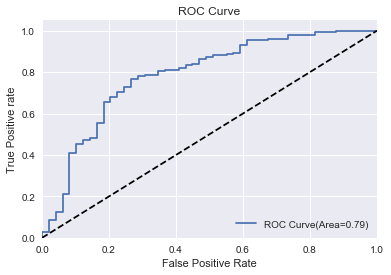

In [19]:
#Validation methods roc_curve
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()


In [ ]:

#SVM 
from sklearn import svm
model_svm=svm.SVC(kernel='linear')
model_svm.fit(X_train,y_train)
pred_svm=model_svm.predict(X_test)
cm_df_svm=pd.DataFrame(confusion_matrix(y_test,pred).T)
cm_df_svm.index.name='Predicted'
cm_df_svm.columns.name='True'
print(cm_df_svm)
print(classification_report(y_test,pred_svm))
model_svm.score(X_test,y_test)
fpr,tpr,__=roc_curve(y_test,pred_svm)

#Calculate the AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC:%0.2f'%roc_auc)


#plot of a ROC Curve for a specific loss
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve(area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SVM')
plt.legend(loc="lower right")
plt.show()


In [20]:
#SVM 
from sklearn import svm
model_svm=svm.SVC(kernel='linear')


In [ ]:
pred_svm=model_svm.predict(X_test)
cm_df_svm=pd.DataFrame(confusion_matrix(y_test,pred_svm).T)